In [1]:
# Uncomment to upgrade packages
# !pip install pandas --user --upgrade --quiet
# !pip install numpy --user --upgrade --quiet
# !pip install scipy --user --upgrade --quiet
# !pip install statsmodels --user --upgrade --quiet
# !pip install seaborn --user --upgrade --quiet
# !pip install scikit-learn --user --upgrade --quiet

%load_ext autoreload

In [2]:
#%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter
from IPython.core.interactiveshell import InteractiveShell
import warnings


InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.precision', 3)
sns.set()
warnings.filterwarnings('ignore')

In [3]:
# extra imports
from pandas import read_csv
from pandas.plotting import scatter_matrix
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [4]:
# gower
# Uncomment to upgrade packages
# !pip install gower
import gower

In [5]:
#llegir dades
Telecom = read_csv("telecom_dbs.csv", index_col=0, delimiter=';')

# gower

In [6]:
Telecom.dtypes

Married                                object
Number of Dependents                    int64
Zip Code                              float64
Number of Referrals                     int64
Tenure in Months                      float64
Offer                                  object
Internet Type                          object
Avg Monthly GB Download               float64
Contract                               object
Paperless Billing                      object
Payment Method                         object
Monthly Charge                        float64
Age_disc                              float64
Total Streaming                       float64
Premium Services                      float64
Refunds                               float64
Average Monthly Extra Data Charges    float64
dtype: object

In [7]:
dist_matrix=gower.gower_matrix(Telecom)

# DBScan

In [8]:
db = DBSCAN(eps=0.1, min_samples=50, metric='precomputed').fit(dist_matrix)

In [9]:
labels = db.labels_
labels

array([-1, -1,  0, ..., -1, -1, -1], dtype=int64)

In [10]:
labs = pd.DataFrame(labels)

In [11]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [12]:
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 2
Estimated number of noise points: 3622


# MDS

In [13]:
#MDS --> plots

In [14]:
from sklearn import manifold

In [15]:
# mds = manifold.MDS(n_components=2, dissimilarity='precomputed', random_state=373)  # n_components=
# t_mds = mds.fit_transform(dist_matrix)

In [16]:
# t_mds

In [17]:
# el pasem a df i el guardem (triga molt a executar)
# df_mds = pd.DataFrame(t_mds)

In [18]:
# df_mds

In [19]:
# df_mds.to_csv('df_mds.csv', sep=';')

In [20]:
df_mds = read_csv("df_mds.csv", index_col=0, delimiter=';')

In [21]:
df_mds

,0,1
0,0.135,0.076
1,-0.160,-0.317
2,-0.203,-0.093
3,-0.097,0.211
4,0.019,0.084
...,...,...
7038,-0.143,-0.329
7039,-0.056,0.164
7040,-0.183,-0.262
7041,0.304,0.237


## projecció pintat per clúster

In [22]:
# scatter plot

In [23]:
status = read_csv("y_Telecom.csv", index_col=0, delimiter=';')

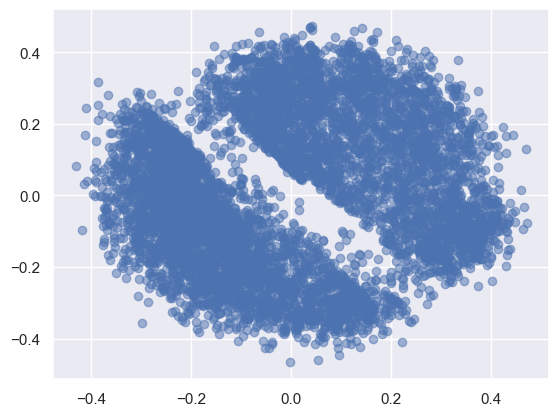

In [24]:
plt.scatter(df_mds['0'], df_mds['1'], alpha=0.5);

In [25]:
tc = df_mds.copy()
tc = tc.join(status)

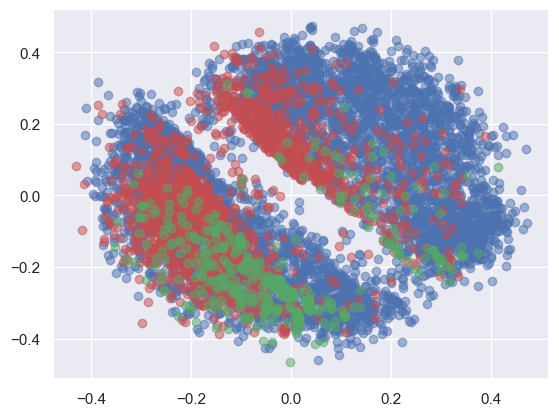

In [26]:
plt.scatter(tc.loc[tc['Customer Status'] == 'Stayed', "0"], tc.loc[tc['Customer Status'] == 'Stayed', "1"], alpha=0.5, color='b');
plt.scatter(tc.loc[tc['Customer Status'] == 'Churned', "0"], tc.loc[tc['Customer Status'] == 'Churned', "1"], alpha=0.5, color='r');
plt.scatter(tc.loc[tc['Customer Status'] == 'Joined', "0"], tc.loc[tc['Customer Status'] == 'Joined', "1"], alpha=0.5, color='g');
#plt.legend();

In [27]:
tc = tc.join(labs)

In [28]:
tc = tc.rename(columns={0: "label"})

In [29]:
tc['label'].value_counts()

-1    3622
 0    2933
 1     488
Name: label, dtype: int64

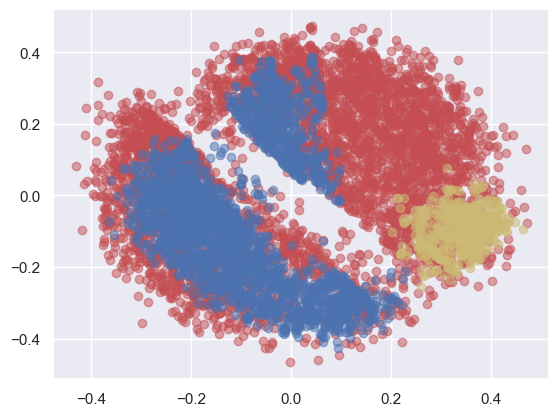

In [30]:


# plt.scatter(tc.loc[tc['label'] == 2, "0"], tc.loc[tc['label'] == 2, "1"], alpha=0.5, color='g');
# plt.scatter(tc.loc[tc['label'] == 3, "0"], tc.loc[tc['label'] == 3, "1"], alpha=0.5, color='c');
# plt.scatter(tc.loc[tc['label'] == 4, "0"], tc.loc[tc['label'] == 4, "1"], alpha=0.5, color='k');
# plt.scatter(tc.loc[tc['label'] == 5, "0"], tc.loc[tc['label'] == 5, "1"], alpha=0.5, color='m');
plt.scatter(tc.loc[tc['label'] == -1, "0"], tc.loc[tc['label'] == -1, "1"], alpha=0.5, color='r');
plt.scatter(tc.loc[tc['label'] == 0, "0"], tc.loc[tc['label'] == 0, "1"], alpha=0.5, color='b');
plt.scatter(tc.loc[tc['label'] == 1, "0"], tc.loc[tc['label'] == 1, "1"], alpha=0.5, color='y');


In [34]:
tele = Telecom.copy()
tele = tele.join(labs)
tele = tele.rename(columns={0: "label"})

In [38]:
tele[tele['label']==-1].shape
tele[tele['label']==-1].describe()

(3622, 18)

,Number of Dependents,Zip Code,Number of Referrals,Tenure in Months,Avg Monthly GB Download,Monthly Charge,Age_disc,Total Streaming,Premium Services,Refunds,Average Monthly Extra Data Charges,label
count,3622.000,3622.000,3622.000,3622.000,3622.000,3622.000,3622.000,3622.000,3622.000,3622.000,3622.000,3622.0
mean,0.308,0.552,0.589,0.566,0.312,0.515,0.425,0.471,0.515,0.118,0.006,-1.0
std,0.462,0.309,0.492,0.328,0.257,0.257,0.289,0.422,0.274,0.322,0.040,0.0
min,0.000,0.000,0.000,0.000,0.000,0.009,0.000,0.000,0.000,0.000,0.000,-1.0
25%,0.000,0.328,0.000,0.282,0.129,0.331,0.167,0.000,0.333,0.000,0.000,-1.0
50%,0.000,0.557,1.000,0.606,0.247,0.534,0.417,0.333,0.500,0.000,0.000,-1.0
75%,1.000,0.869,1.000,0.873,0.482,0.713,0.667,1.000,0.667,0.000,0.000,-1.0
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,-1.0


In [39]:
tele[tele['label']==0].shape
tele[tele['label']==0].describe()

(2933, 18)

,Number of Dependents,Zip Code,Number of Referrals,Tenure in Months,Avg Monthly GB Download,Monthly Charge,Age_disc,Total Streaming,Premium Services,Refunds,Average Monthly Extra Data Charges,label
count,2933.000,2933.000,2933.000,2933.000,2933.000,2933.000,2933.000,2933.000,2933.000,2933.000,2933.000,2933.0
mean,0.048,0.576,0.208,0.263,0.194,0.469,0.473,0.319,0.299,0.028,0.008,0.0
std,0.215,0.297,0.406,0.285,0.198,0.298,0.275,0.399,0.238,0.164,0.043,0.0
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0
25%,0.000,0.344,0.000,0.028,0.024,0.089,0.250,0.000,0.167,0.000,0.000,0.0
50%,0.000,0.574,0.000,0.155,0.165,0.559,0.500,0.000,0.333,0.000,0.000,0.0
75%,0.000,0.869,0.000,0.423,0.282,0.715,0.667,0.667,0.500,0.000,0.000,0.0
max,1.000,1.000,1.000,1.000,1.000,0.976,1.000,1.000,1.000,1.000,1.000,0.0


In [40]:
tele[tele['label']==1].shape
tele[tele['label']==1].describe()

(488, 18)

,Number of Dependents,Zip Code,Number of Referrals,Tenure in Months,Avg Monthly GB Download,Monthly Charge,Age_disc,Total Streaming,Premium Services,Refunds,Average Monthly Extra Data Charges,label
count,488.000,488.000,488.000,488.000,4.880e+02,488.000,488.000,488.0,488.000,488.000,488.0,488.0
mean,0.760,0.600,0.977,0.599,3.616e-04,0.047,0.385,0.0,0.055,0.037,0.0,1.0
std,0.427,0.303,0.149,0.324,7.988e-03,0.024,0.233,0.0,0.081,0.189,0.0,0.0
min,0.000,0.000,0.000,0.000,0.000e+00,0.016,0.000,0.0,0.000,0.000,0.0,1.0
25%,1.000,0.361,1.000,0.310,0.000e+00,0.029,0.167,0.0,0.000,0.000,0.0,1.0
50%,1.000,0.639,1.000,0.641,0.000e+00,0.034,0.417,0.0,0.000,0.000,0.0,1.0
75%,1.000,0.873,1.000,0.901,0.000e+00,0.074,0.583,0.0,0.167,0.000,0.0,1.0
max,1.000,1.000,1.000,1.000,1.765e-01,0.187,1.000,0.0,0.500,1.000,0.0,1.0


In [45]:
Telecom.dtypes

Married                                object
Number of Dependents                    int64
Zip Code                              float64
Number of Referrals                     int64
Tenure in Months                      float64
Offer                                  object
Internet Type                          object
Avg Monthly GB Download               float64
Contract                               object
Paperless Billing                      object
Payment Method                         object
Monthly Charge                        float64
Age_disc                              float64
Total Streaming                       float64
Premium Services                      float64
Refunds                               float64
Average Monthly Extra Data Charges    float64
dtype: object

In [46]:
c0=tele[tele['label']==0]
c1=tele[tele['label']==1]

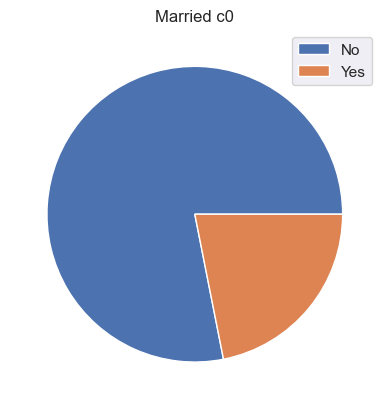

In [51]:
fig, ax = plt.subplots();
patches, _ = ax.pie(c0["Married"].value_counts());
ax.legend(patches, labels=c0["Married"].value_counts().index, loc="best");  # ordre labels
plt.title("Married c0")
plt.show();

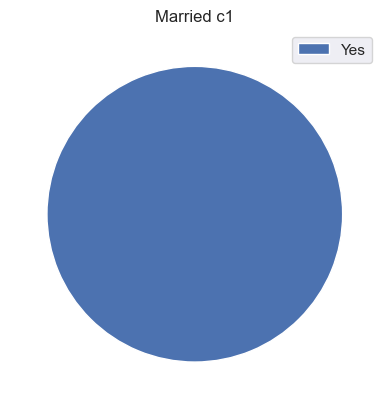

In [52]:
fig, ax = plt.subplots();
patches, _ = ax.pie(c1["Married"].value_counts());
ax.legend(patches, labels=c1["Married"].value_counts().index, loc="best");  # ordre labels
plt.title("Married c1")
plt.show();

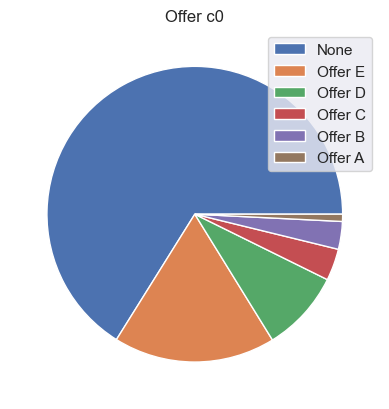

In [49]:
fig, ax = plt.subplots();
patches, _ = ax.pie(c0["Offer"].value_counts());
ax.legend(patches, labels=c0["Offer"].value_counts().index, loc="best");  # ordre labels
plt.title("Offer c0")
plt.show();

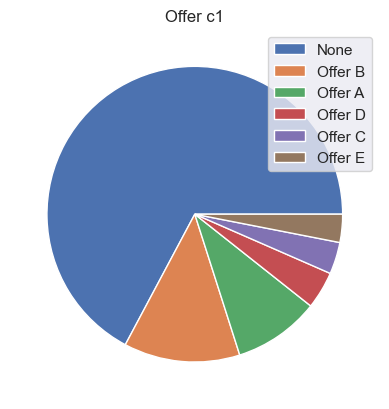

In [53]:
fig, ax = plt.subplots();
patches, _ = ax.pie(c1["Offer"].value_counts());
ax.legend(patches, labels=c1["Offer"].value_counts().index, loc="best");  # ordre labels
plt.title("Offer c1")
plt.show();

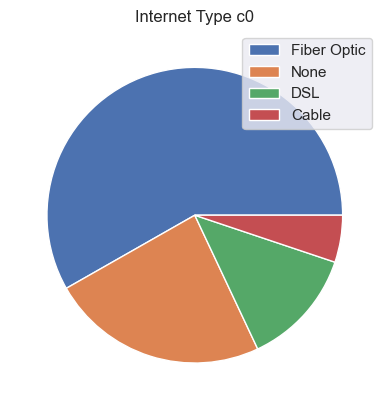

In [54]:
fig, ax = plt.subplots();
patches, _ = ax.pie(c0["Internet Type"].value_counts());
ax.legend(patches, labels=c0["Internet Type"].value_counts().index, loc="best");  # ordre labels
plt.title("Internet Type c0")
plt.show();

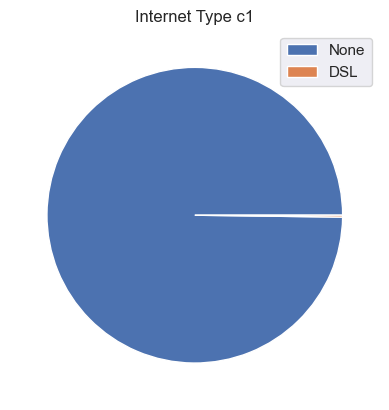

In [55]:
fig, ax = plt.subplots();
patches, _ = ax.pie(c1["Internet Type"].value_counts());
ax.legend(patches, labels=c1["Internet Type"].value_counts().index, loc="best");  # ordre labels
plt.title("Internet Type c1")
plt.show();

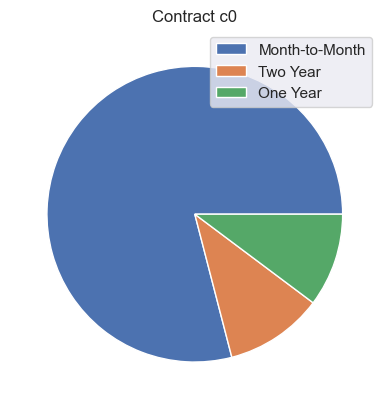

In [56]:
fig, ax = plt.subplots();
patches, _ = ax.pie(c0["Contract"].value_counts());
ax.legend(patches, labels=c0["Contract"].value_counts().index, loc="best");  # ordre labels
plt.title("Contract c0")
plt.show();

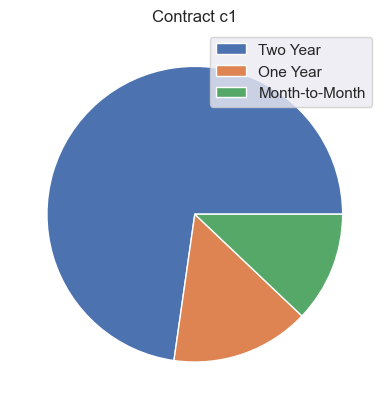

In [57]:
fig, ax = plt.subplots();
patches, _ = ax.pie(c1["Contract"].value_counts());
ax.legend(patches, labels=c1["Contract"].value_counts().index, loc="best");  # ordre labels
plt.title("Contract c1")
plt.show();

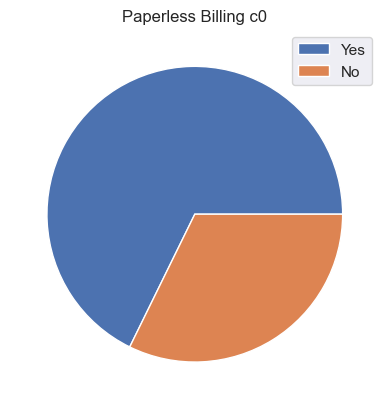

In [58]:
fig, ax = plt.subplots();
patches, _ = ax.pie(c0["Paperless Billing"].value_counts());
ax.legend(patches, labels=c0["Paperless Billing"].value_counts().index, loc="best");  # ordre labels
plt.title("Paperless Billing c0")
plt.show();

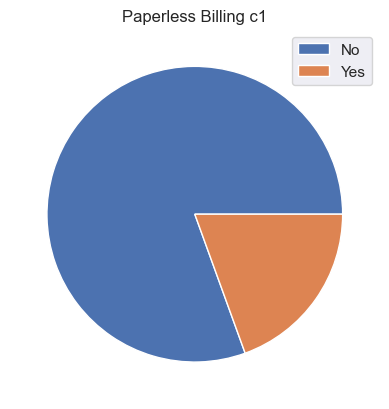

In [59]:
fig, ax = plt.subplots();
patches, _ = ax.pie(c1["Paperless Billing"].value_counts());
ax.legend(patches, labels=c1["Paperless Billing"].value_counts().index, loc="best");  # ordre labels
plt.title("Paperless Billing c1")
plt.show();

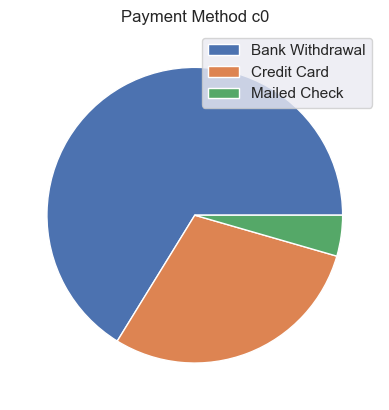

In [60]:
fig, ax = plt.subplots();
patches, _ = ax.pie(c0["Payment Method"].value_counts());
ax.legend(patches, labels=c0["Payment Method"].value_counts().index, loc="best");  # ordre labels
plt.title("Payment Method c0")
plt.show();

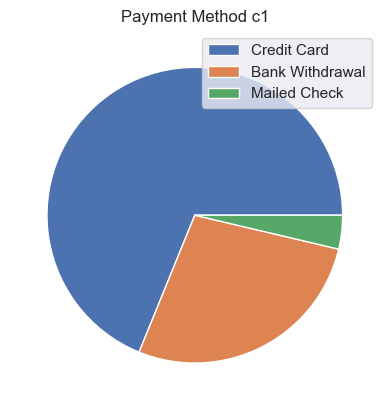

In [61]:
fig, ax = plt.subplots();
patches, _ = ax.pie(c1["Payment Method"].value_counts());
ax.legend(patches, labels=c1["Payment Method"].value_counts().index, loc="best");  # ordre labels
plt.title("Payment Method c1")
plt.show();

In [44]:
data_crosstab = pd.crosstab(tc['label'], 
                                tc['Customer Status'],
                                    margins = False)
data_crosstab

Customer Status,Churned,Joined,Stayed
label,,,
-1,564,116,2942
0,1301,323,1309
1,4,15,469
